This notebook contains

In [ ]:
import numpy as np
import pandas as pd
import os
from os import path
from wordcloud import WordCloud
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.neighbors import (KNeighborsClassifier, NeighborhoodComponentsAnalysis)
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as SklearnLinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer

In [ ]:

heading =['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
df = pd.read_csv('/content/drive/MyDrive/census+income/adult.data', header=None, names = heading, na_values="?", skipinitialspace = True)
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<Axes: xlabel='count', ylabel='occupation'>

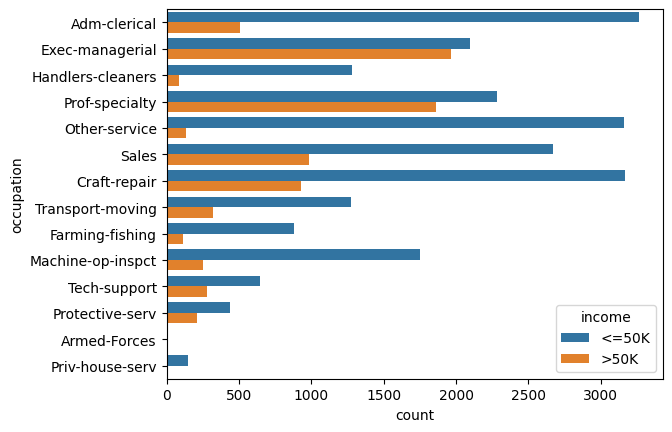

In [ ]:
sns.countplot(y='occupation', hue='income', data=df,)

<Axes: xlabel='count', ylabel='education'>

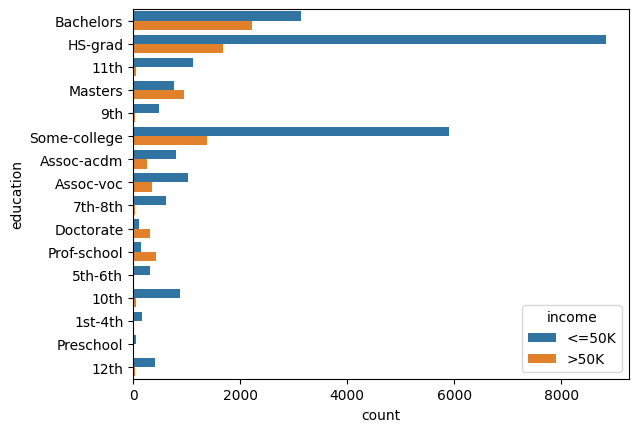

In [ ]:
sns.countplot(y='education', hue='income', data=df,)

In [ ]:
!pip install scikit-learn


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

<=50K    24720
>50K      7841
Name: income, dtype: int64


<Axes: ylabel='income'>

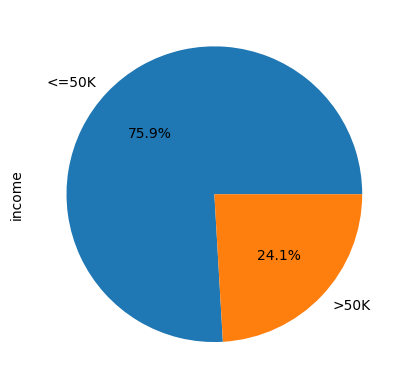

In [ ]:
print(df['income'].value_counts())
df['income'].value_counts().plot.pie(autopct='%1.1f%%')

**age**

In [ ]:
def draw_distplot(column, title = ""):

    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    ax.set_facecolor((0,0,0.10))
    sns.distplot(column)

    mean_value = column.mean()
    plt.axvline(mean_value, c='red', linewidth=1.5, label="mean")

    median_value = column.median()
    plt.axvline(median_value, c='blue', linewidth=1.5, label="median")
    plt.legend(loc='upper right', prop={'size': 20})
    plt.title(title)
    plt.show()

<ipython-input-9-1a6dd7d6c355>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(column)


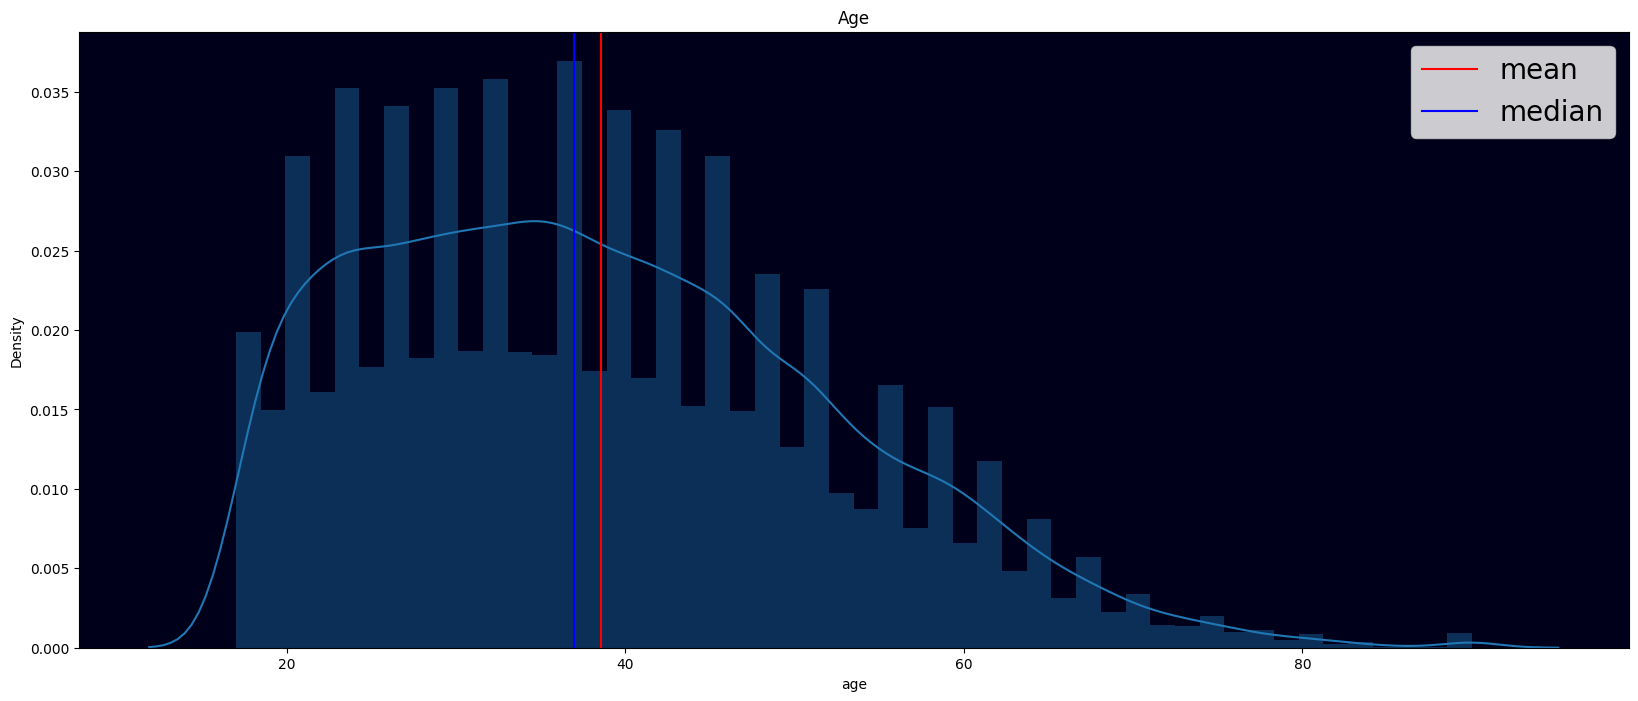

In [ ]:
draw_distplot(column=df['age'], title="Age")

In [ ]:
print('precise median age for >50K income : ',df[df['income']=='>50K']['age'].median(), 'yrs')

precise median age for >50K income :  44.0 yrs


In [ ]:
def draw_countplot(countplot_x, countplot_hue, countplot_data, figsize_a=20, figsize_b=10, xticks_rotation=45):
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111)
    ax.set_facecolor((0,0,0.20))
    plt.xticks(rotation = xticks_rotation)
    plt.rc('xtick',labelsize=8)
    sns.countplot(x = countplot_x, hue = countplot_hue, data = countplot_data)
    plt.legend(prop={'size': 20})
    plt.show()

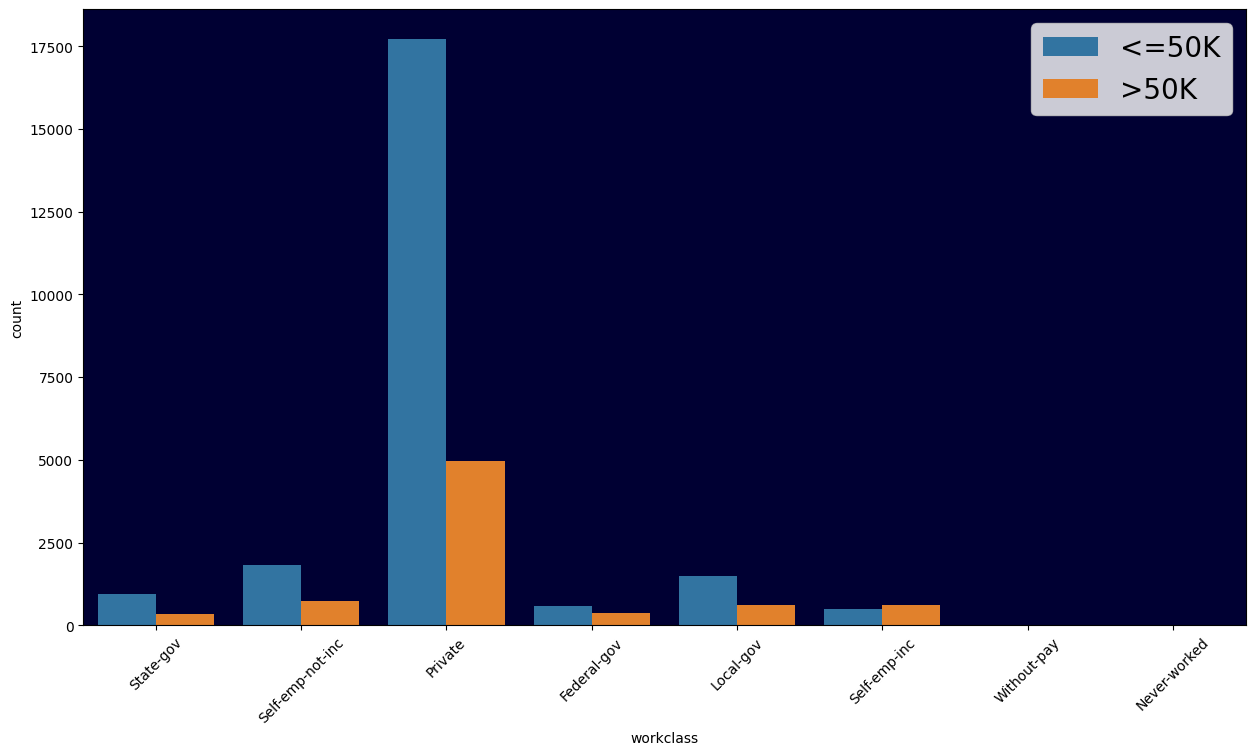

In [ ]:
draw_countplot(countplot_x='workclass', countplot_hue='income', countplot_data=df)

In [ ]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df['workclass'].replace(['Never-worked', 'Without-pay', 'Federal-gov'],'Other', inplace = True)
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Other                 981
Name: workclass, dtype: int64

In [ ]:
pd.isnull(df["workclass"]).value_counts()

False    30725
True      1836
Name: workclass, dtype: int64

In [ ]:
df['workclass'].fillna('Other', inplace = True)
df['workclass'].value_counts()

Private             22696
Other                2817
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Name: workclass, dtype: int64

<ipython-input-9-1a6dd7d6c355>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(column)


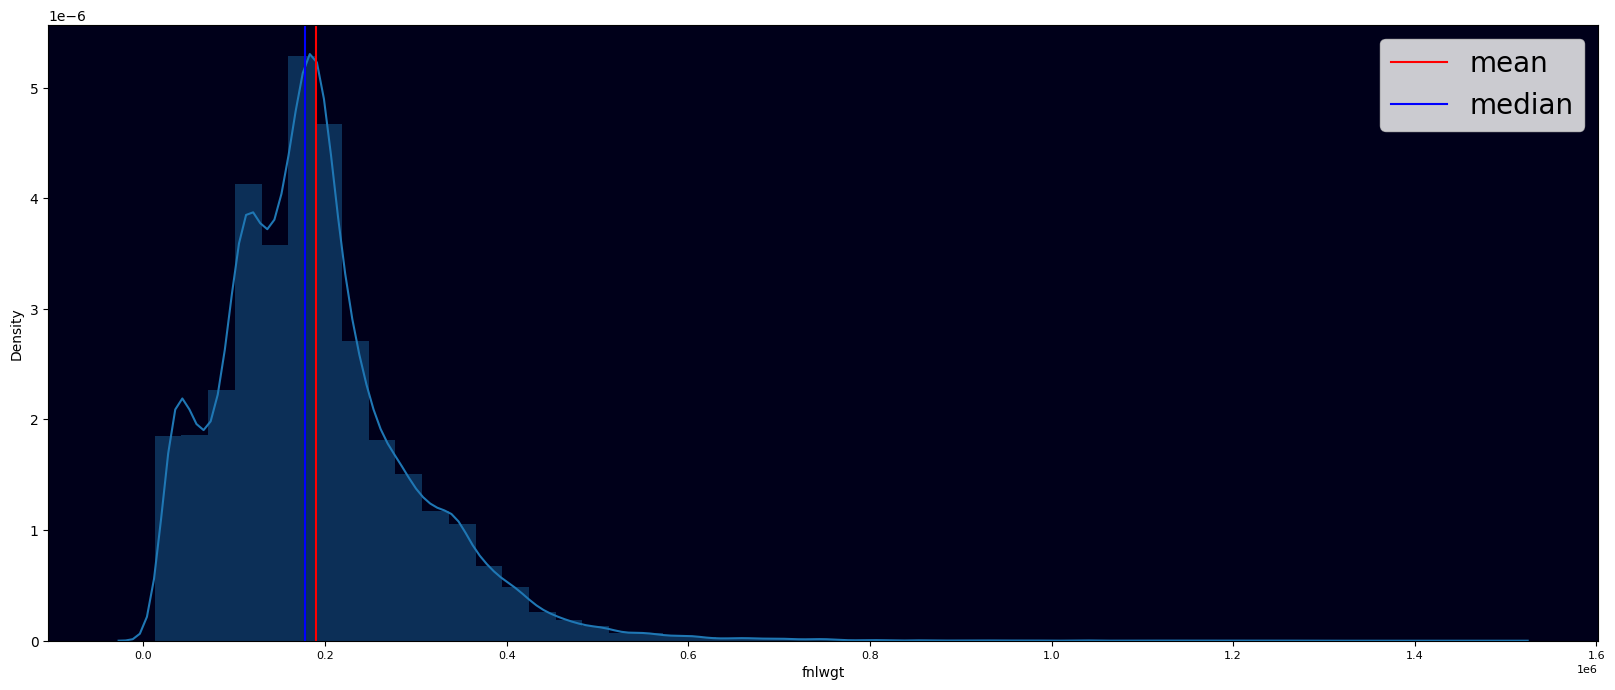

In [ ]:
draw_distplot(column=df['fnlwgt'])

In [ ]:
df = df.drop(['fnlwgt'], axis=1)

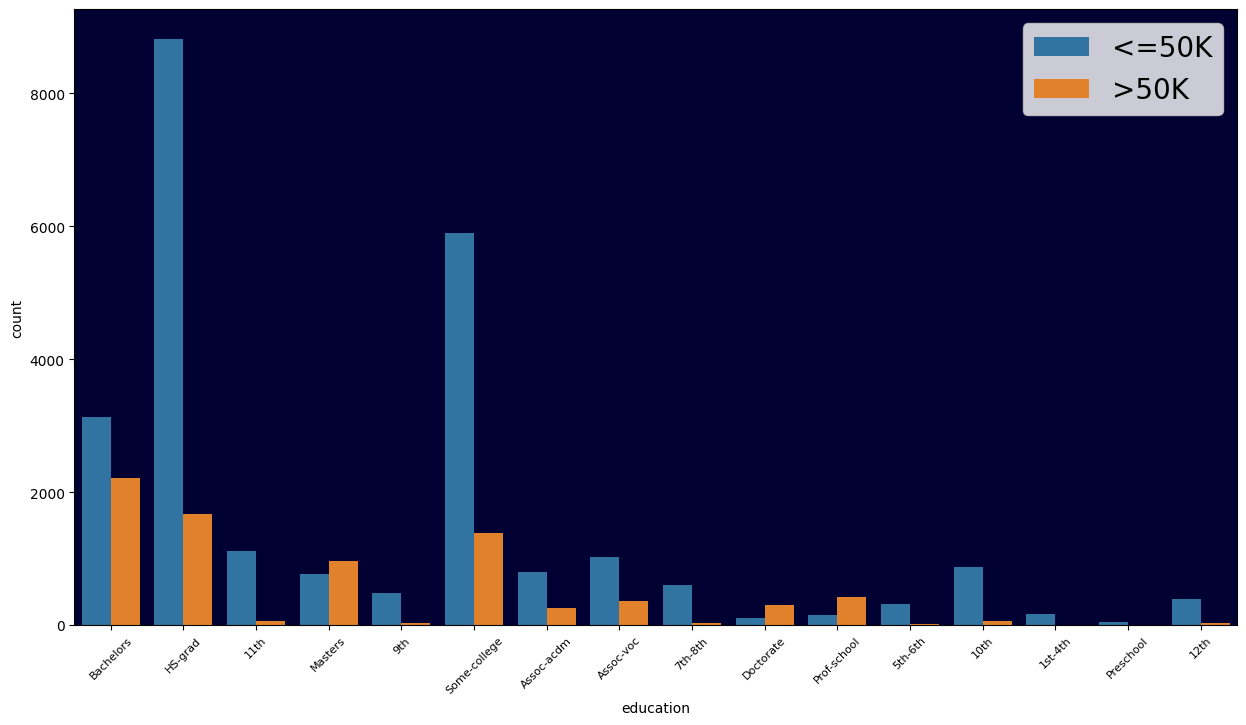

In [ ]:
draw_countplot(countplot_x='education', countplot_hue='income', countplot_data=df)

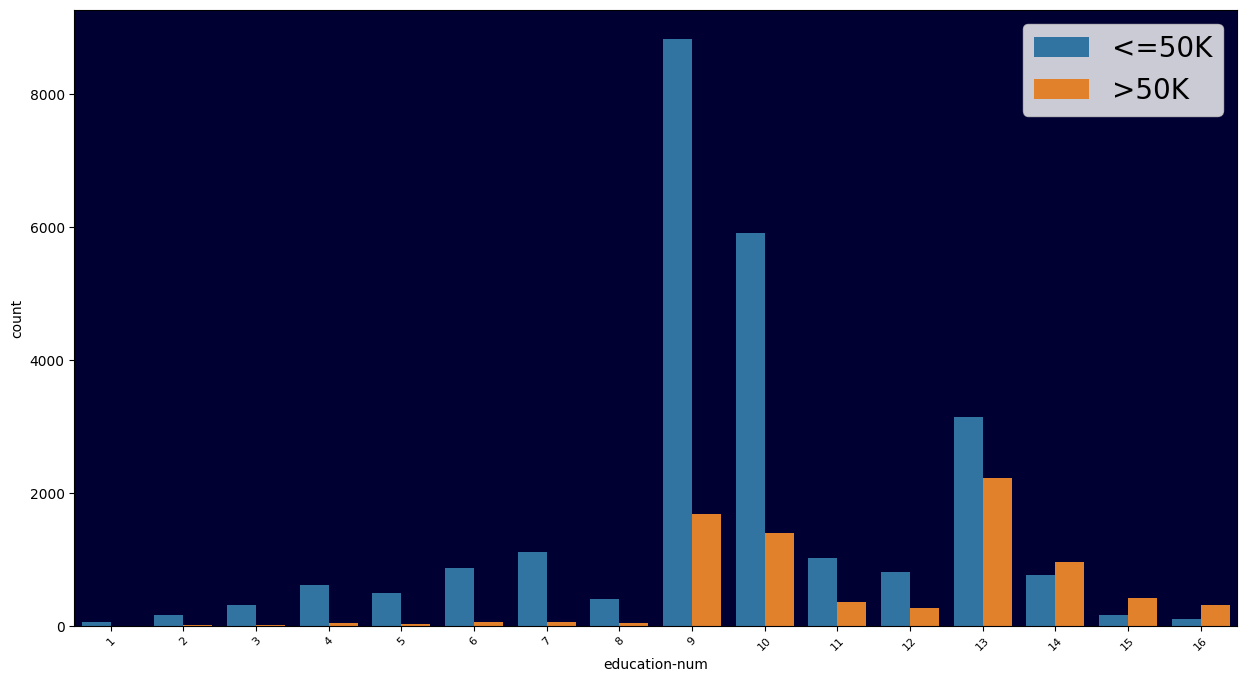

In [ ]:
draw_countplot(countplot_x='education-num', countplot_hue='income', countplot_data=df)

In [ ]:
education_var = df['education'].unique()
for edu_var in education_var:
    print("For {}, the Education Number is {}"
          .format(edu_var, df[df['education'] == edu_var]['education-num'].unique()))

For Bachelors, the Education Number is [13]
For HS-grad, the Education Number is [9]
For 11th, the Education Number is [7]
For Masters, the Education Number is [14]
For 9th, the Education Number is [5]
For Some-college, the Education Number is [10]
For Assoc-acdm, the Education Number is [12]
For Assoc-voc, the Education Number is [11]
For 7th-8th, the Education Number is [4]
For Doctorate, the Education Number is [16]
For Prof-school, the Education Number is [15]
For 5th-6th, the Education Number is [3]
For 10th, the Education Number is [6]
For 1st-4th, the Education Number is [2]
For Preschool, the Education Number is [1]
For 12th, the Education Number is [8]


In [ ]:
df.drop(['education'], axis = 1, inplace = True)

In [ ]:
df['education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

In [ ]:
df['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

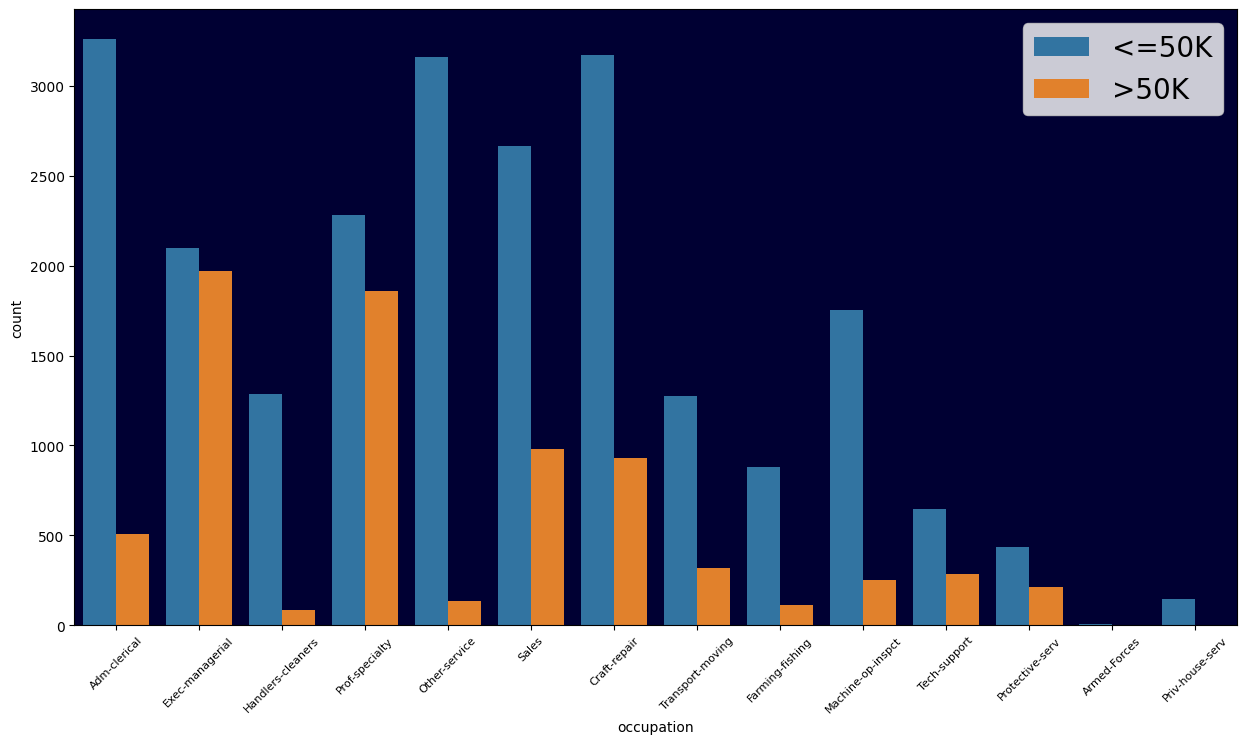

In [ ]:
draw_countplot(countplot_x='occupation', countplot_hue='income', countplot_data=df)

In [ ]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
# creating bool series True for NaN values
bool_series = pd.isnull(df["occupation"])
# filtering data
print("displaying data only with team = NaN")
df[bool_series]

displaying data only with team = NaN


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
27,54,Other,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,Other,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,Other,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,Other,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,Other,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,Other,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
32531,30,Other,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,Other,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32541,41,Other,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [ ]:
bool_series.value_counts()

False    30718
True      1843
Name: occupation, dtype: int64

In [ ]:
f'Missing values about Occupation is {(df["occupation"].isnull().sum()/(df["occupation"].count()+df["occupation"].isnull().sum())):2.2%} of all data'

'Missing values about Occupation is 5.66% of all data'

In [ ]:
df['occupation'].fillna('Other', inplace = True)
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Other                1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
df['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [ ]:
pd.isnull(df["relationship"]).value_counts()

False    32561
Name: relationship, dtype: int64

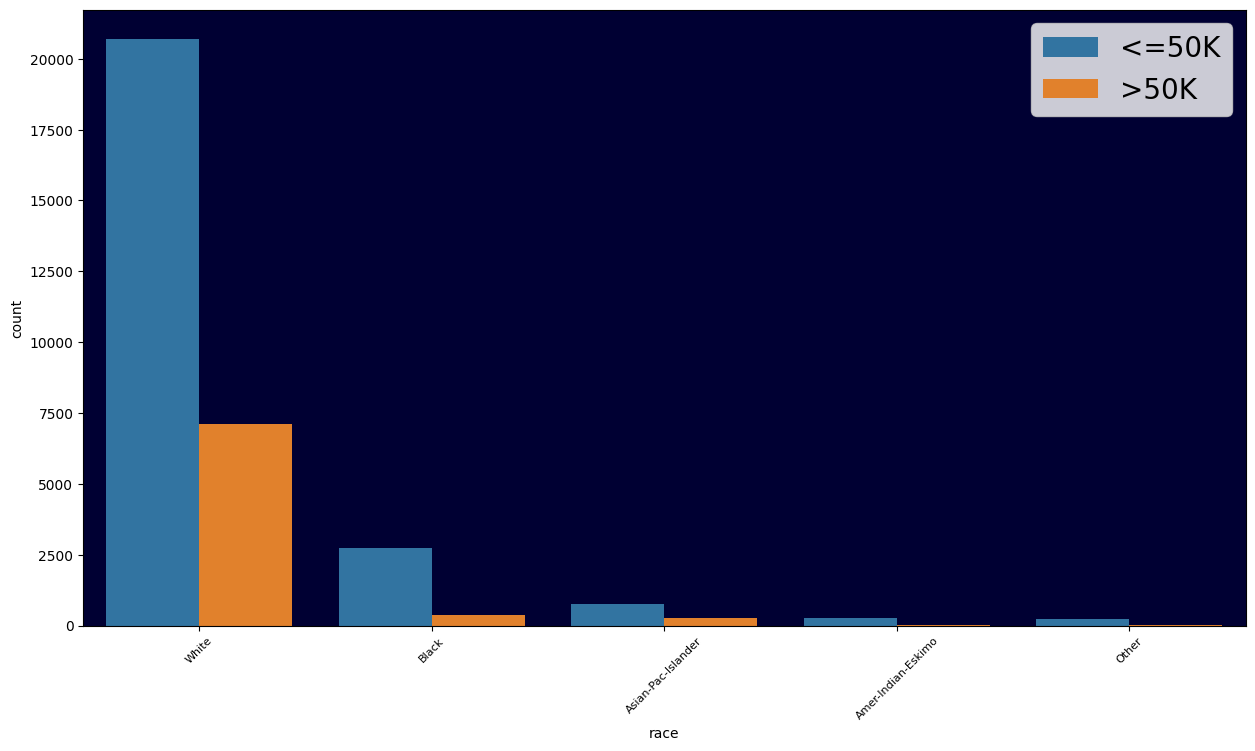

In [ ]:
draw_countplot(countplot_x='race', countplot_hue='income', countplot_data=df)

In [ ]:
df['race'].replace(['Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],'Other', inplace = True)
df['race'].value_counts()

White    27816
Black     3124
Other     1621
Name: race, dtype: int64

sex     income
Female  <=50K      9592
        >50K       1179
Male    <=50K     15128
        >50K       6662
Name: income, dtype: int64
------------------------------------------------


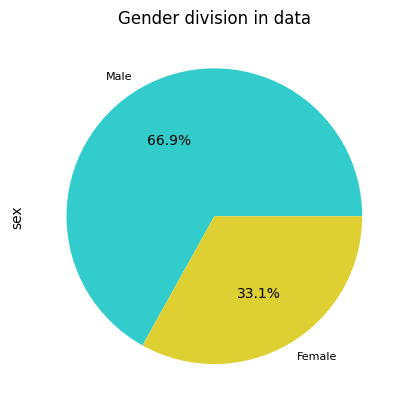

<Figure size 1000x600 with 0 Axes>

------------------------------------------------


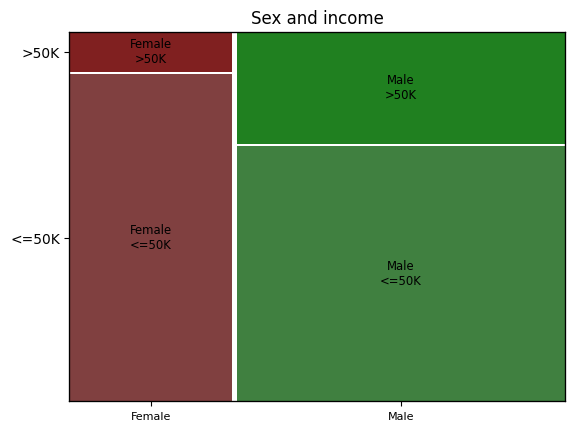

In [ ]:
sex_income = pd.DataFrame({'sex': df['sex'], 'income': df['income']})
data = sex_income.income.groupby([sex_income.sex,  sex_income.income]).size()
plt.title('Gender division in data')
print(data)
print('------------------------------------------------')
df['sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#33cccc','#ded033'])
plt.figure(figsize=(10,6))
plt.show()
print('------------------------------------------------')
mosaic(data, gap=0.01, title = "Sex and income")
plt.show()

<ipython-input-9-1a6dd7d6c355>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(column)


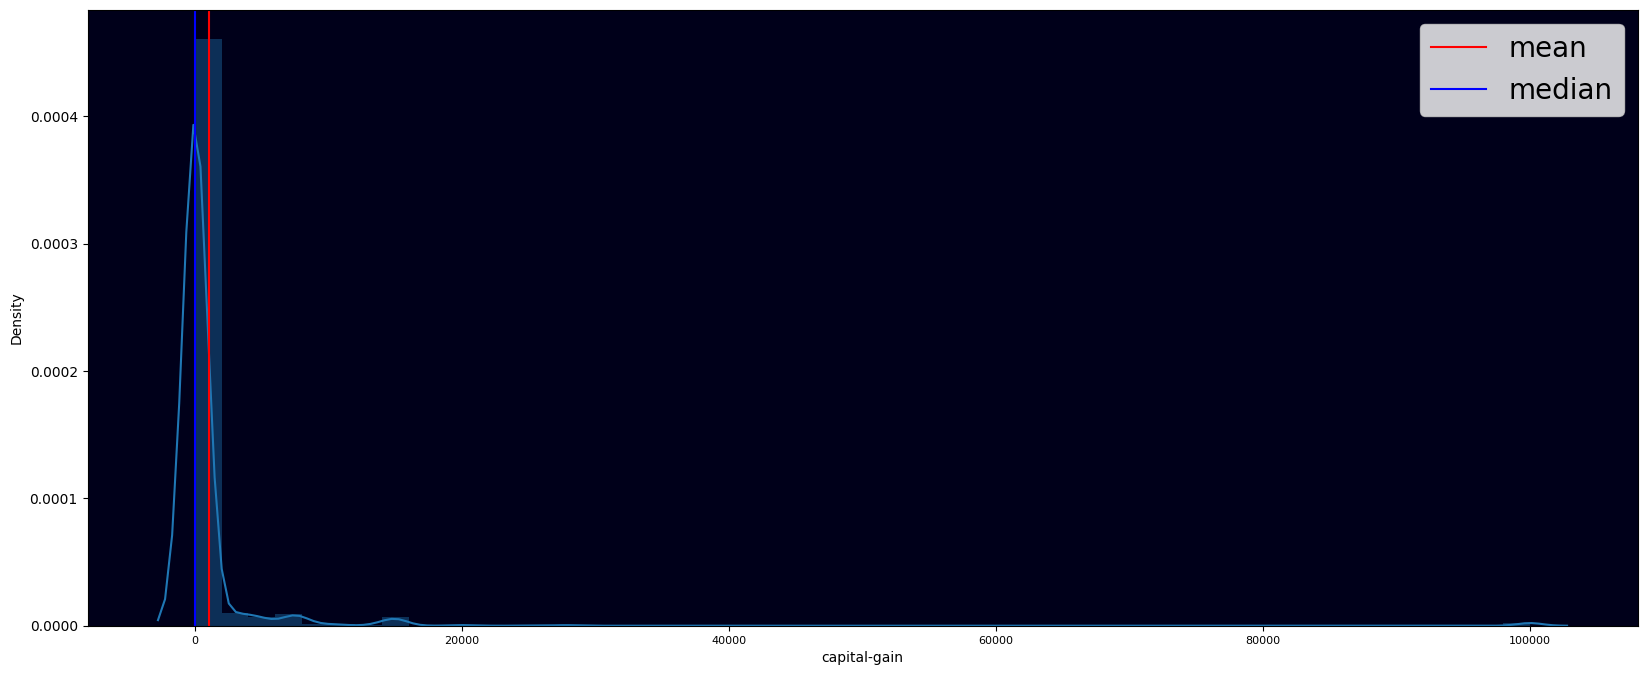

In [ ]:
draw_distplot(column=df['capital-gain'])

In [ ]:
print(df['capital-gain'].value_counts())

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital-gain, Length: 119, dtype: int64


<ipython-input-9-1a6dd7d6c355>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(column)


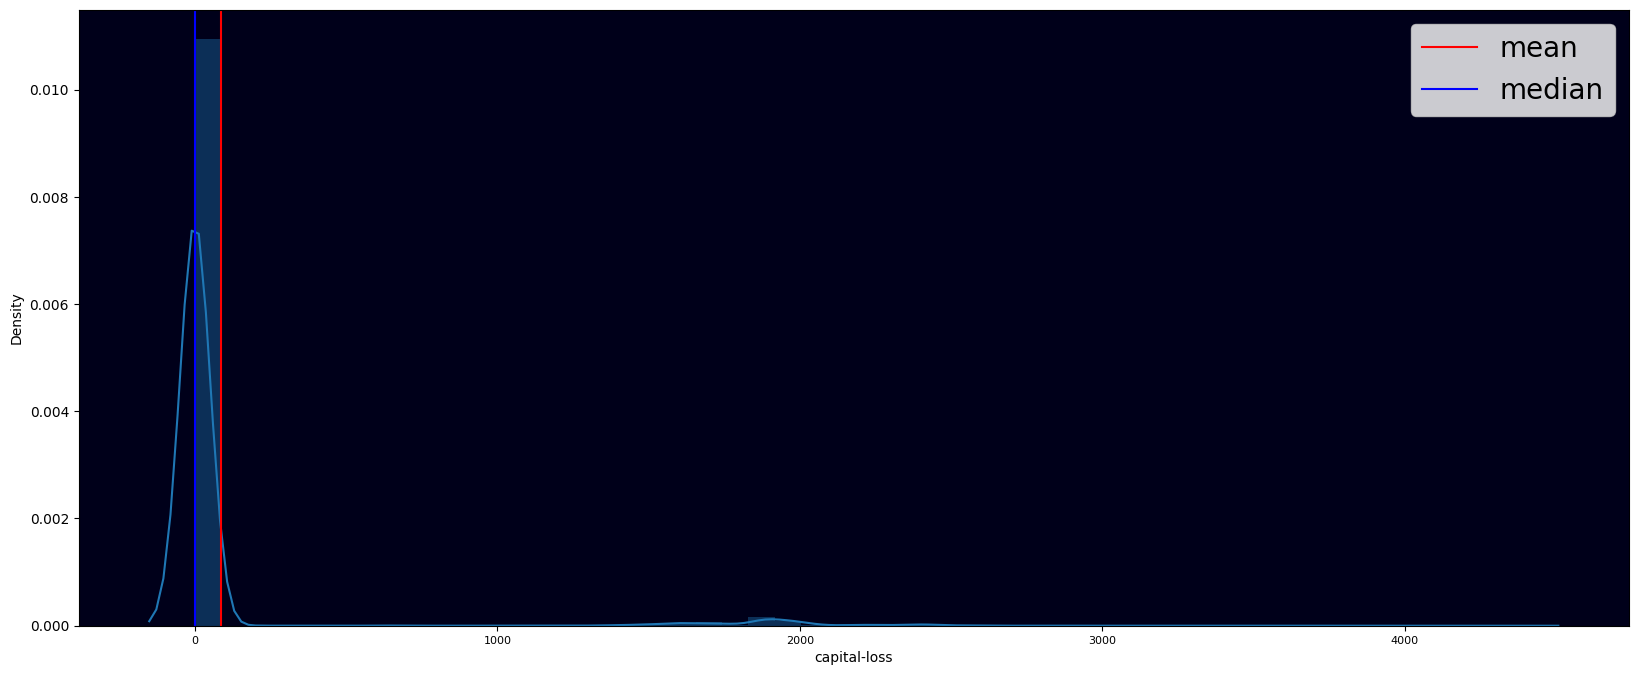

In [ ]:
draw_distplot(column=df['capital-loss'])

In [ ]:
print(df['capital-loss'].value_counts())

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital-loss, Length: 92, dtype: int64


<ipython-input-9-1a6dd7d6c355>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(column)


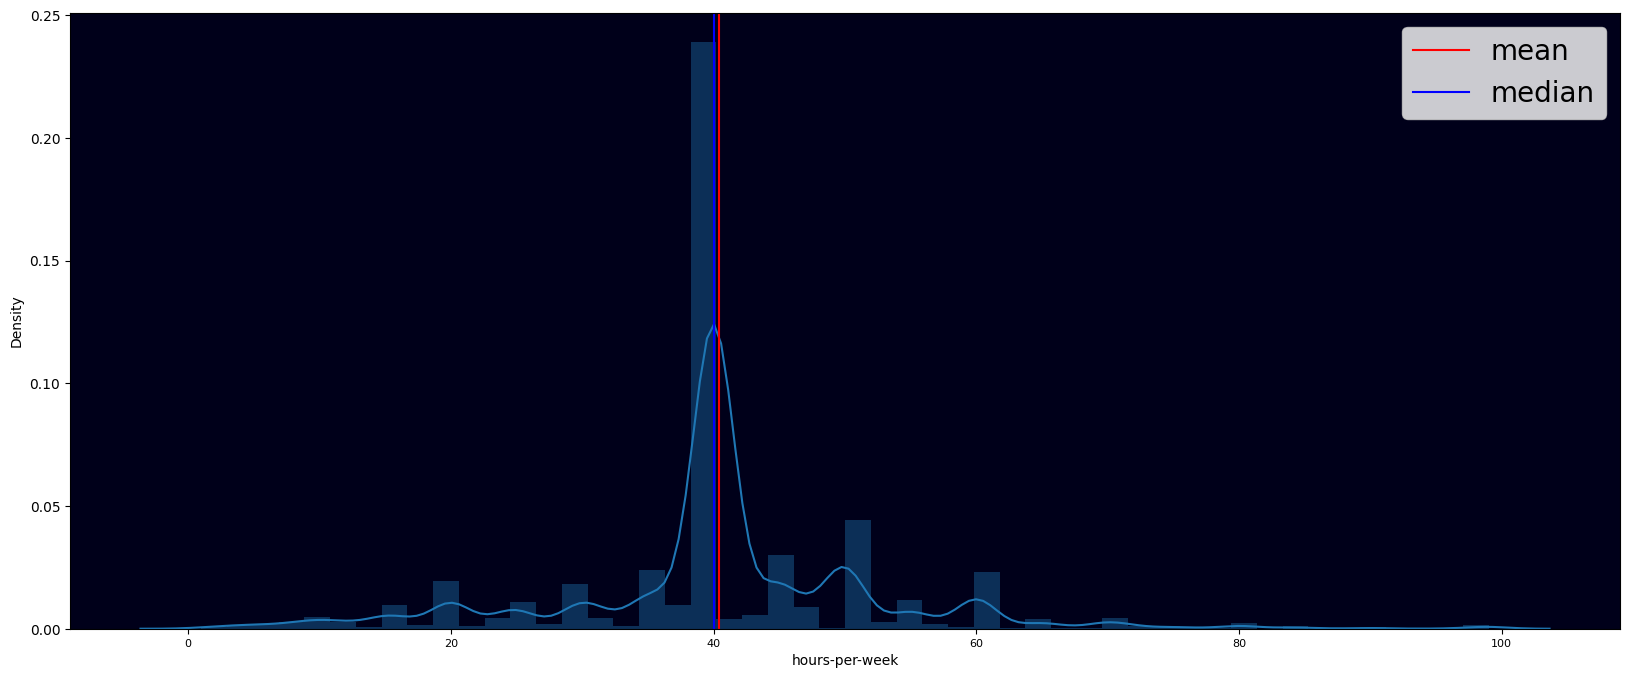

In [ ]:
draw_distplot(column=df['hours-per-week'])

In [ ]:
print(df['native-country'].value_counts())

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

Text(0.5, 1.0, 'Total adults from each Country')

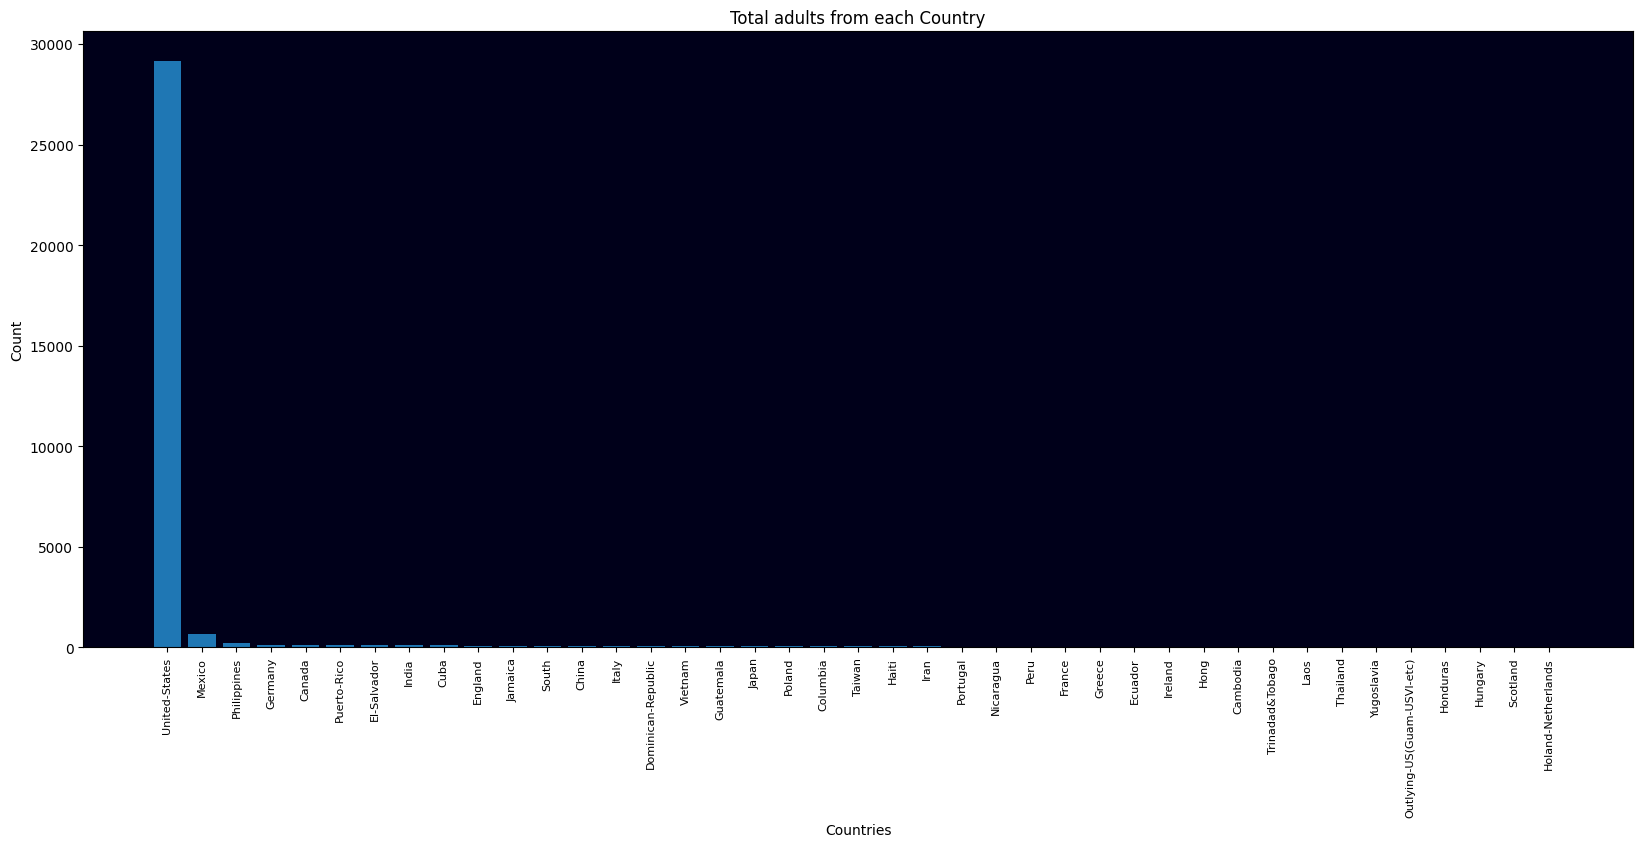

In [ ]:
country_count = df['native-country'].value_counts()
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.set_facecolor((0,0,0.10))
plt.bar(country_count.index, country_count.values)
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Total adults from each Country')

<Axes: xlabel='count', ylabel='native-country'>

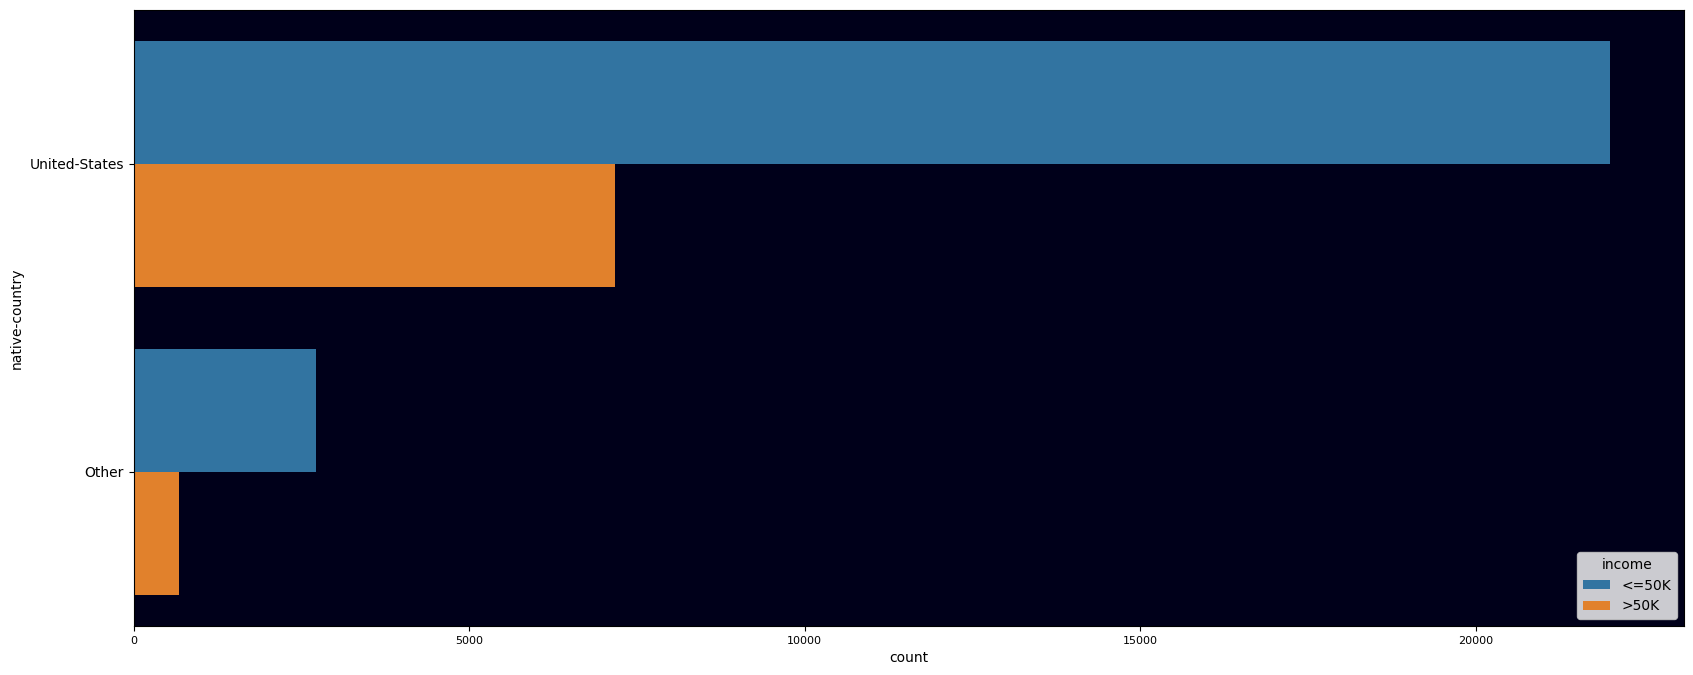

In [ ]:
df = df.drop(df[df['native-country'] == '?'].index)
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.set_facecolor((0,0,0.10))
countries = np.array(df['native-country'].unique())
countries = np.delete(countries, 0)
df['native-country'].replace(countries, 'Other', inplace = True)
sns.countplot(y = 'native-country', hue = 'income', data = df)

In [ ]:
df['target'] = df['income']
df['target'] = np.where(df['income'].isin(['>50K']), 1, 0)

In [ ]:
missing_values_income = df['income'].isnull().sum()
print("Missing values in INCOME column ", missing_values_income)

Missing values in INCOME column  0


<ipython-input-47-ea0e2d6b3f12>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmax=.9, square=True, annot=True, fmt='.1f', center=0)


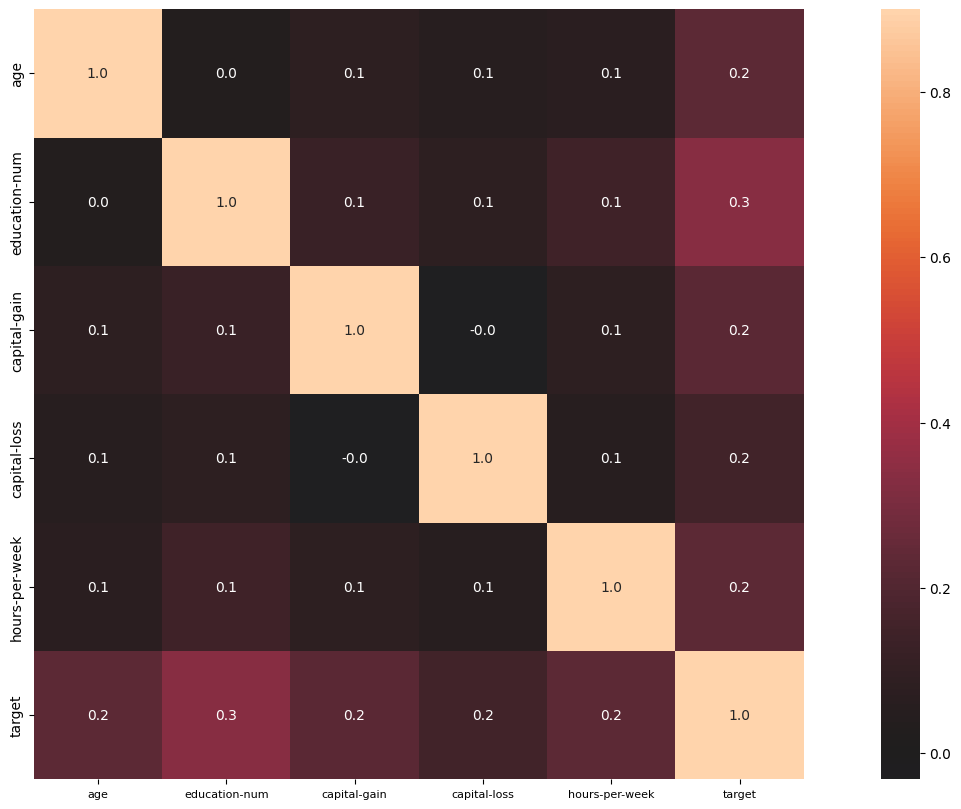

In [ ]:
plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(), vmax=.9, square=True, annot=True, fmt='.1f', center=0)
plt.show()

In [ ]:
df = df.drop(columns=['income'])

In [ ]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Other,0


In [ ]:
df.isnull().sum()

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [ ]:
df.to_csv('cleanedIncomeAdult')

In [ ]:
target = 'target'
num_features = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'education-num']
cat_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [ ]:
class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X = X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns = new_columns, index = X.index)
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}_{self.categories_[i][j]}')
                j += 1
        return new_columns

In [ ]:
encoder = OneHotEncoder()
encoder_cols = encoder.fit_transform(df[cat_features])

In [ ]:
df = pd.concat([pd.concat([df[num_features], encoder_cols], axis=1), df[target]], axis=1)

In [ ]:
df.head()

,age,capital-gain,capital-loss,hours-per-week,education-num,workclass_Local-gov,workclass_Other,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Unmarried,relationship_Wife,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Other,native-country_United-States,target
0,39,2174,0,40,13,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
1,50,0,0,13,13,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
2,38,0,0,40,9,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
3,53,0,0,40,7,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
4,28,0,0,40,13,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0


In [ ]:
features = df.columns.tolist()
features.remove(target)
X = df[features]

y = df[target]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
clf = RandomForestClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.8519883310302472
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4942
           1       0.72      0.63      0.67      1571

    accuracy                           0.85      6513
   macro avg       0.80      0.78      0.79      6513
weighted avg       0.85      0.85      0.85      6513



In [ ]:
X.to_csv('x.csv')

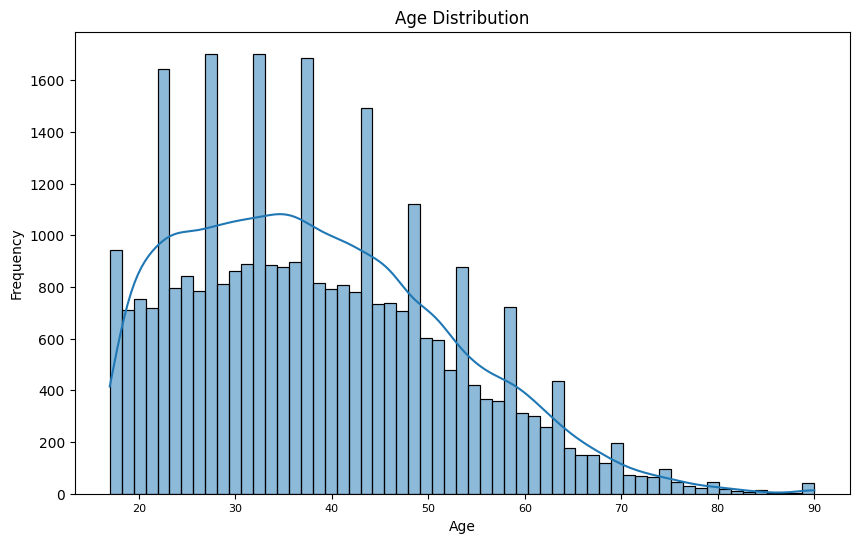

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram/Density plot for age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [ ]:
pip install diffprivlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 kB 4.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from diffprivlib.mechanisms import Laplace

# Define your dataset

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

# Define the epsilon values and features
epsilon_values = [0.0001,0.001,0.01, 0.1, 0.5, 1, 5]  # Updated epsilon values
features_noise = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'education-num']  # Your features

# Function to add Laplace noise using diffprivlib
def add_laplace_noise(data, epsilon):
    laplace_mechanism = Laplace(epsilon=epsilon, sensitivity=1)
    noisy_data = []
    for value in data:
        noisy_value = value + laplace_mechanism.randomise(0)
        noisy_data.append(noisy_value)
    return np.array(noisy_data)

# Dictionary to store results
results = {}

# Apply differential privacy and retrain model
for feature in features_noise:
    results[feature] = {}
    for epsilon in epsilon_values:
        # Apply noise
        X_train_noisy = X_train.copy()
        X_train_noisy[feature] = add_laplace_noise(X_train_noisy[feature].values, epsilon)

        # Retrain the model
        clf = RandomForestClassifier()
        clf.fit(X_train_noisy, y_train)
        y_pred = clf.predict(X_test)

        # Evaluate performance
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')

        # Store results
        results[feature][epsilon] = {'accuracy': accuracy, 'f1_score': f1}

# Print or analyze the results
for feature, epsilons in results.items():
    print(f"Feature: {feature}")
    for epsilon, metrics in epsilons.items():
        print(f"  Epsilon: {epsilon}, Accuracy: {metrics['accuracy']}, F1-Score: {metrics['f1_score']}")


Feature: age
  Epsilon: 0.0001, Accuracy: 0.841087056655919, F1-Score: 0.7708400070125261
  Epsilon: 0.001, Accuracy: 0.839091048671887, F1-Score: 0.7679047575004965
  Epsilon: 0.01, Accuracy: 0.8406264394288346, F1-Score: 0.7734264004643749
  Epsilon: 0.1, Accuracy: 0.8473821587594043, F1-Score: 0.7812539617364846
  Epsilon: 0.5, Accuracy: 0.8489175495163519, F1-Score: 0.7853155203860734
  Epsilon: 1, Accuracy: 0.8490710885920467, F1-Score: 0.7846621702867262
  Epsilon: 5, Accuracy: 0.8519883310302472, F1-Score: 0.7894789149379111
Feature: capital-gain
  Epsilon: 0.0001, Accuracy: 0.8395516658989712, F1-Score: 0.7639445844808925
  Epsilon: 0.001, Accuracy: 0.8533701827115001, F1-Score: 0.7861254006550085
  Epsilon: 0.01, Accuracy: 0.8549055734684478, F1-Score: 0.7879383820783723
  Epsilon: 0.1, Accuracy: 0.8592046675879011, F1-Score: 0.7962658003547631
  Epsilon: 0.5, Accuracy: 0.857976354982343, F1-Score: 0.7967824533567153
  Epsilon: 1, Accuracy: 0.8582834331337326, F1-Score: 0.7956

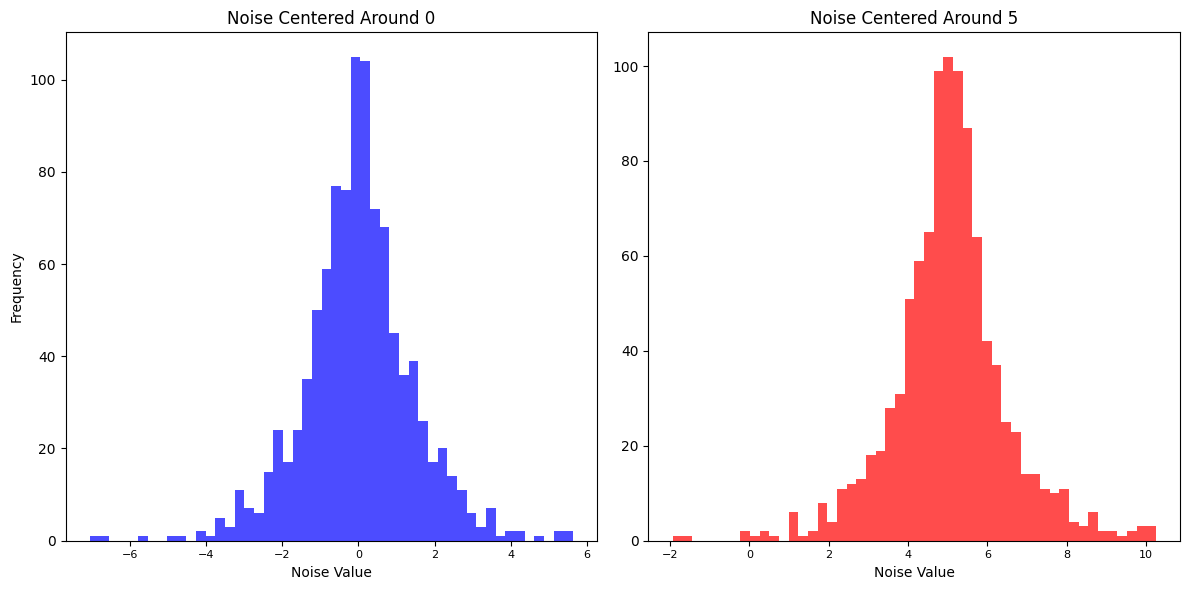

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from diffprivlib.mechanisms import Laplace

# Define epsilon
epsilon = 1

# Create a Laplace mechanism instance
laplace_mechanism = Laplace(epsilon=epsilon, sensitivity=1)

# Generate noise centered around 0
noise_centered_0 = [laplace_mechanism.randomise(0) for _ in range(1000)]

# Generate noise centered around 5
noise_centered_5 = [laplace_mechanism.randomise(5) for _ in range(1000)]

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(noise_centered_0, bins=50, alpha=0.7, color='blue')
plt.title("Noise Centered Around 0")
plt.xlabel("Noise Value")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(noise_centered_5, bins=50, alpha=0.7, color='red')
plt.title("Noise Centered Around 5")
plt.xlabel("Noise Value")

plt.tight_layout()
plt.show()



In [ ]:
df


,age,capital-gain,capital-loss,hours-per-week,education-num,workclass_Local-gov,workclass_Other,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Unmarried,relationship_Wife,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Other,native-country_United-States,target
0,39,2174,0,40,13,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
1,50,0,0,13,13,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
2,38,0,0,40,9,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
3,53,0,0,40,7,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
4,28,0,0,40,13,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0,0,38,12,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0
32557,40,0,0,40,9,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1
32558,58,0,0,40,9,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0
32559,22,0,0,20,9,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from diffprivlib.mechanisms import Laplace

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Define epsilon values for differential privacy
epsilon_values = [0.0001, 0.001, 0.01, 0.1, 1, 5,10]

# Function to add Laplace noise
def add_laplace_noise(data, epsilon):
    laplace_mechanism = Laplace(epsilon=epsilon, sensitivity=1)
    noisy_data = data.applymap(lambda x: x + laplace_mechanism.randomise(0))
    return noisy_data
# Function to create a simple neural network
def create_nn():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
# nnModel = create_nn()
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Simple Neural Network": create_nn()
}


# Train and evaluate models for each epsilon value
results = {model_name: {"Original Data": {}, "Private Data": {epsilon: {} for epsilon in epsilon_values}} for model_name in models}

# Train on original data
for model_name, model in models.items():
    if model_name == "Simple Neural Network":
        model = create_nn()
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
        y_pred = (model.predict(X_test) > 0.5).astype("int32")
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    # Store results for original data
    results[model_name]["Original Data"]['Accuracy'] = accuracy
    results[model_name]["Original Data"]['F1-Score'] = f1

# Train on private data
for epsilon in epsilon_values:
    X_train_noisy = add_laplace_noise(X_train, epsilon)

    for model_name, model in models.items():
        if model_name == "Simple Neural Network":

            model.fit(X_train_noisy, y_train, epochs=10, batch_size=32, verbose=0)
            y_pred = (model.predict(X_test) > 0.5).astype("int32")
        else:
            model.fit(X_train_noisy, y_train)
            y_pred = model.predict(X_test)

        # Evaluate performance
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')

        # Store results for private data
        results[model_name]["Private Data"][epsilon]['Accuracy'] = accuracy
        results[model_name]["Private Data"][epsilon]['F1-Score'] = f1

# Print results
for model_name, data_types in results.items():
    print(f"{model_name}:")
    for data_type, data in data_types.items():
        if data_type == "Original Data":
            print(f"  {data_type}: Accuracy = {data['Accuracy']}, F1-Score = {data['F1-Score']}")
        else:
            for epsilon, metrics in data.items():
                print(f"    Epsilon: {epsilon}, Accuracy: {metrics['Accuracy']}, F1-Score: {metrics['F1-Score']}")
    print()



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


204/204 [==============================] - 1s 6ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


204/204 [==============================] - 3s 13ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


204/204 [==============================] - 3s 13ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


204/204 [==============================] - 3s 15ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


204/204 [==============================] - 4s 18ms/step
Logistic Regression:
  Original Data: Accuracy = 0.8421618301857823, F1-Score = 0.7601146915475534
    Epsilon: 0.0001, Accuracy: 0.7646245969599264, F1-Score: 0.45648042757648866
    Epsilon: 0.001, Accuracy: 0.8016275142023646, F1-Score: 0.5977131000984826
    Epsilon: 0.01, Accuracy: 0.8040841394134808, F1-Score: 0.6346985293678086
    Epsilon: 0.1, Accuracy: 0.8079226163058498, F1-Score: 0.6495930184925911
    Epsilon: 1, Accuracy: 0.8136035621065562, F1-Score: 0.6603403546201171
    Epsilon: 5, Accuracy: 0.8384768923691079, F1-Score: 0.7470954465283113
    Epsilon: 10, Accuracy: 0.82081989866421, F1-Score: 0.7080355542887806

SVM:
  Original Data: Accuracy = 0.806540764624597, F1-Score = 0.6498345260994756
    Epsilon: 0.0001, Accuracy: 0.7646245969599264, F1-Score: 0.45648042757648866
    Epsilon: 0.001, Accuracy: 0.8011668969752802, F1-Score: 0.5973144317033204
    Epsilon: 0.01, Accuracy: 0.8019345923537541, F1-Score: 0.59

In [ ]:
results

{'Logistic Regression': {'Original Data': {'Accuracy': 0.8421618301857823,
   'F1-Score': 0.7601146915475534},
  'Private Data': {0.0001: {'Accuracy': 0.7646245969599264,
    'F1-Score': 0.45648042757648866},
   0.001: {'Accuracy': 0.8016275142023646, 'F1-Score': 0.5977131000984826},
   0.01: {'Accuracy': 0.8040841394134808, 'F1-Score': 0.6346985293678086},
   0.1: {'Accuracy': 0.8079226163058498, 'F1-Score': 0.6495930184925911},
   1: {'Accuracy': 0.8136035621065562, 'F1-Score': 0.6603403546201171},
   5: {'Accuracy': 0.8384768923691079, 'F1-Score': 0.7470954465283113},
   10: {'Accuracy': 0.82081989866421, 'F1-Score': 0.7080355542887806}}},
 'SVM': {'Original Data': {'Accuracy': 0.806540764624597,
   'F1-Score': 0.6498345260994756},
  'Private Data': {0.0001: {'Accuracy': 0.7646245969599264,
    'F1-Score': 0.45648042757648866},
   0.001: {'Accuracy': 0.8011668969752802, 'F1-Score': 0.5973144317033204},
   0.01: {'Accuracy': 0.8019345923537541, 'F1-Score': 0.5990466000587941},
   0.1

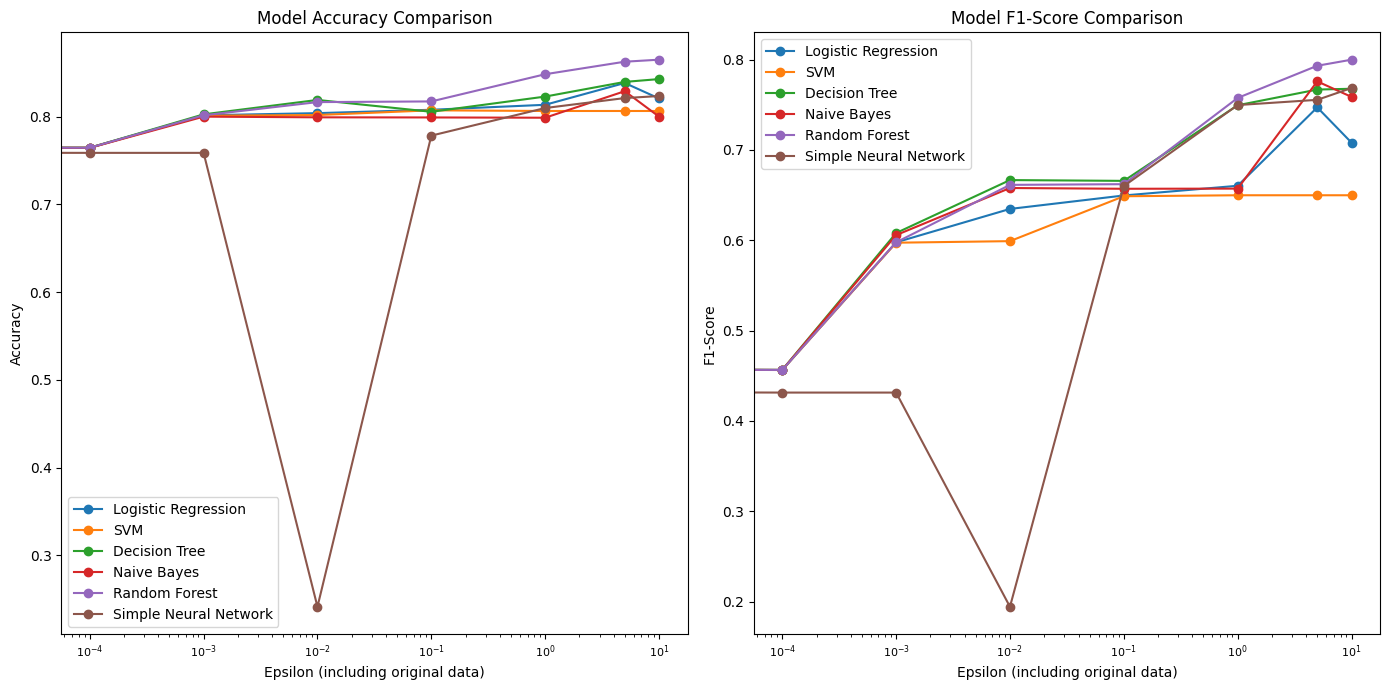

In [ ]:
import matplotlib.pyplot as plt


epsilons = [0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

# Plotting
plt.figure(figsize=(14, 7))

# Accuracy plot
plt.subplot(1, 2, 1)
for model_name, data in results.items():
    acc_values = [data['Original Data']['Accuracy']] + [data['Private Data'][eps]['Accuracy'] for eps in epsilons]
    plt.plot([0] + epsilons, acc_values, marker='o', label=model_name)
plt.title("Model Accuracy Comparison")
plt.xlabel("Epsilon (including original data)")
plt.ylabel("Accuracy")
plt.xscale('log')
plt.legend()

# F1-score plot
plt.subplot(1, 2, 2)
for model_name, data in results.items():
    f1_values = [data['Original Data']['F1-Score']] + [data['Private Data'][eps]['F1-Score'] for eps in epsilons]
    plt.plot([0] + epsilons, f1_values, marker='o', label=model_name)
plt.title("Model F1-Score Comparison")
plt.xlabel("Epsilon (including original data)")
plt.ylabel("F1-Score")
plt.xscale('log')
plt.legend()

plt.tight_layout()
plt.show()



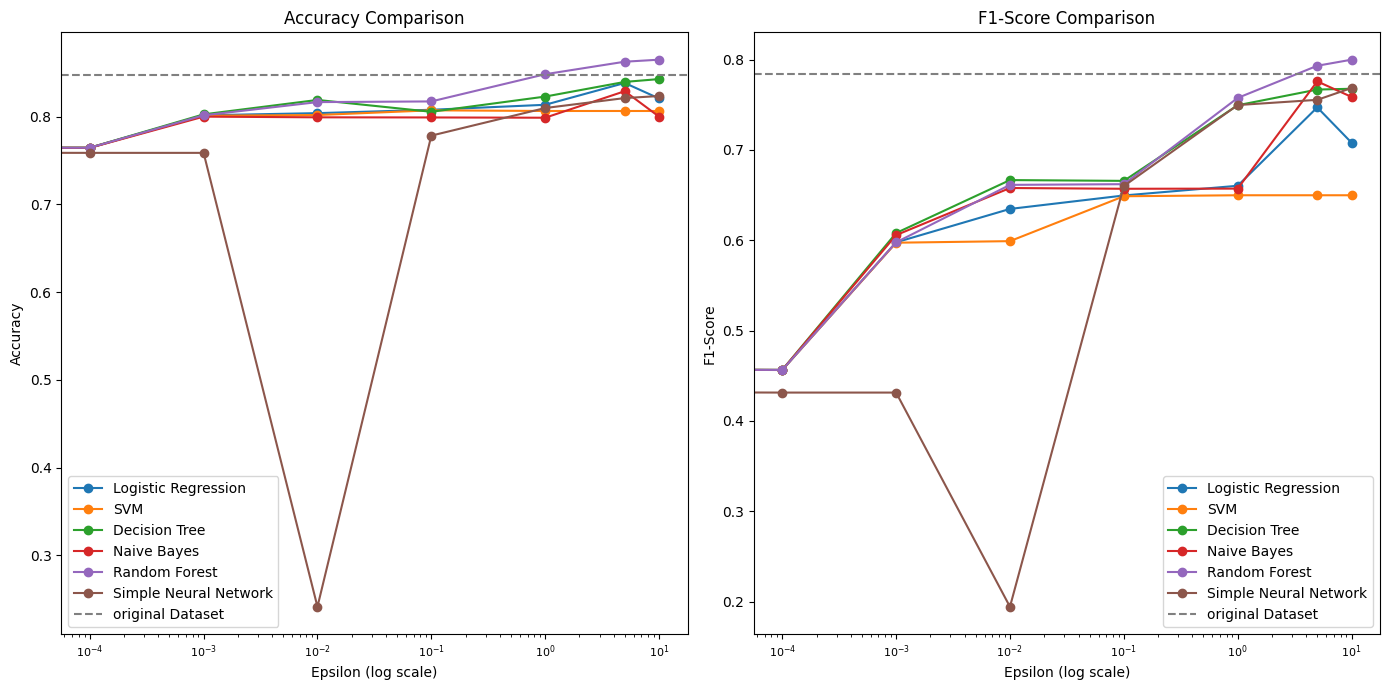

In [ ]:
import matplotlib.pyplot as plt


epsilons = [0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

# Initialize the plot
plt.figure(figsize=(14, 7))

# Plot Accuracy
plt.subplot(1, 2, 1)
for model, result in results.items():
    original_acc = result['Original Data']['Accuracy']
    epsilons_acc = [result['Private Data'][eps]['Accuracy'] for eps in epsilons]
    plt.plot([0] + epsilons, [original_acc] + epsilons_acc, marker='o', label=model)
plt.axhline(y=original_acc, color='grey', linestyle='--',label="original Dataset")
plt.xscale('log')
plt.xlabel('Epsilon (log scale)')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend()

# Plot F1-Score
plt.subplot(1, 2, 2)
for model, result in results.items():
    original_f1 = result['Original Data']['F1-Score']
    epsilons_f1 = [result['Private Data'][eps]['F1-Score'] for eps in epsilons]
    plt.plot([0] + epsilons, [original_f1] + epsilons_f1, marker='o', label=model)
plt.axhline(y=original_f1, color='grey', linestyle='--',label="original Dataset")
plt.xscale('log')
plt.xlabel('Epsilon (log scale)')
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison')
plt.legend()

# Finalize and show plot
plt.tight_layout()
plt.show()


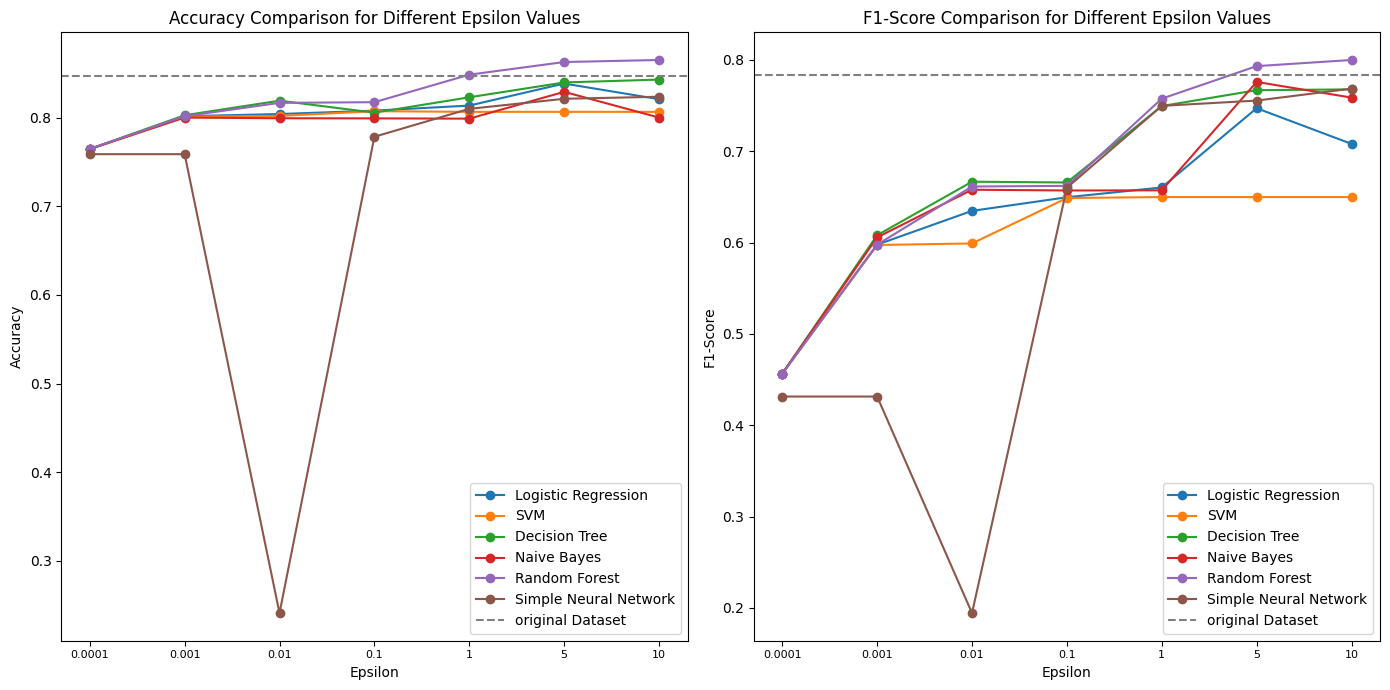

In [ ]:
import matplotlib.pyplot as plt


epsilon_labels = ['0.0001', '0.001', '0.01', '0.1', '1', '5', '10']

# Initialize the plot
plt.figure(figsize=(14, 7))

# Plot Accuracy
plt.subplot(1, 2, 1)
for model, result in results.items():
    accuracy_scores =[result['Private Data'][eps]['Accuracy'] for eps in epsilons]
    plt.plot(epsilon_labels, accuracy_scores, marker='o', label=model)
plt.axhline(y=original_acc, color='grey', linestyle='--',label="original Dataset")
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Different Epsilon Values')
plt.legend()

# Plot F1-Score
plt.subplot(1, 2, 2)
for model, result in results.items():
    f1_scores =[result['Private Data'][eps]['F1-Score'] for eps in epsilons]
    plt.plot(epsilon_labels, f1_scores, marker='o', label=model)
plt.axhline(y=original_f1, color='grey', linestyle='--',label="original Dataset")
plt.xlabel('Epsilon')
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison for Different Epsilon Values')
plt.legend()

# Finalize and show plot
plt.tight_layout()
plt.show()
